In [1]:
import sys, os
sys.path.append(os.path.abspath('..'))


In [2]:
import src.limpieza_datos as ld
print("Módulo limpieza_datos importado correctamente")


Módulo limpieza_datos importado correctamente


In [3]:
# Cargar el dataset principal del estudio de tatuajes
df = ld.cargar_datos("../data/tattoo_studio_dataset.csv")
df.head()


,Mobile_Number,Age,Gender,Appointment_Date,Day_of_Week,Session_Type,Tattoo_Size,Tattoo_Style,Artist_Name,Session_Hours,Final_Rate,Additional_Services,Total_Bill,Payment_Mode,Customer_Satisfaction
0,3478163327,46,Female,2024-11-15,Friday,Pre-booked,Sleeve/Back,Minimalist,Artist B,9,47647,NaN,47647,UPI,3
1,3107420369,32,Male,2024-12-14,Saturday,Walk-in,Small,Custom,Artist C,1,42498,NaN,42498,Card,2
2,4181241943,25,Male,2024-11-08,Friday,Pre-booked,Sleeve/Back,Custom,Artist A,10,19778,NaN,19778,Cash,1
3,4051802512,38,Female,2024-03-01,Friday,Pre-booked,Medium,Script,Artist D,4,5478,NaN,5478,Cash,4
4,3958682846,36,Male,2024-03-06,Wednesday,Pre-booked,Sleeve/Back,Tribal,Artist B,10,32471,Consultation Fee,33471,Card,1


In [4]:
#rutas de entrada y salida de datos
ruta_entrada = os.path.abspath('../data/tattoo_studio_dataset.csv')   # CSV original
ruta_salida  = os.path.abspath('../data/tattoo_studio_clean.csv')     # CSV limpio que generaremos

# Mostrar rutas para verificar
ruta_entrada, ruta_salida


('C:\\Users\\paula gisel\\PycharmProjects\\PythonProject\\data\\tattoo_studio_dataset.csv',
 'C:\\Users\\paula gisel\\PycharmProjects\\PythonProject\\data\\tattoo_studio_clean.csv')

In [5]:
ld.valores_nulos(df)

,Mobile_Number,Age,Gender,Appointment_Date,Day_of_Week,Session_Type,Tattoo_Size,Tattoo_Style,Artist_Name,Session_Hours,Final_Rate,Additional_Services,Total_Bill,Payment_Mode,Customer_Satisfaction
0,3.478163e+09,46.0,Female,2024-11-15,Friday,Pre-booked,Sleeve/Back,Minimalist,Artist B,9.0,47647.0,Desconocido,47647.0,UPI,3.0
1,3.107420e+09,32.0,Male,2024-12-14,Saturday,Walk-in,Small,Custom,Artist C,1.0,42498.0,Desconocido,42498.0,Card,2.0
2,4.181242e+09,25.0,Male,2024-11-08,Friday,Pre-booked,Sleeve/Back,Custom,Artist A,10.0,19778.0,Desconocido,19778.0,Cash,1.0
3,4.051803e+09,38.0,Female,2024-03-01,Friday,Pre-booked,Medium,Script,Artist D,4.0,5478.0,Desconocido,5478.0,Cash,4.0
4,3.958683e+09,36.0,Male,2024-03-06,Wednesday,Pre-booked,Sleeve/Back,Tribal,Artist B,10.0,32471.0,Consultation Fee,33471.0,Card,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4.659356e+09,46.0,Female,2024-10-20,Sunday,Pre-booked,Small,Realism,Artist C,2.0,4836.0,Desconocido,4836.0,UPI,3.0
1996,5.165761e+09,23.0,Female,2024-04-30,Tuesday,Walk-in,Small,Script,Artist A,1.0,6341.0,Desconocido,6341.0,Cash,5.0
1997,4.934257e+09,49.0,Female,2024-08-31,Saturday,Pre-booked,Medium,Custom,Artist A,2.0,21768.0,Piercing,23268.0,UPI,2.0
1998,5.361618e+09,46.0,Male,2024-06-02,Sunday,Walk-in,Large,Realism,Artist B,5.0,45750.0,Consultation Fee,46750.0,UPI,2.0


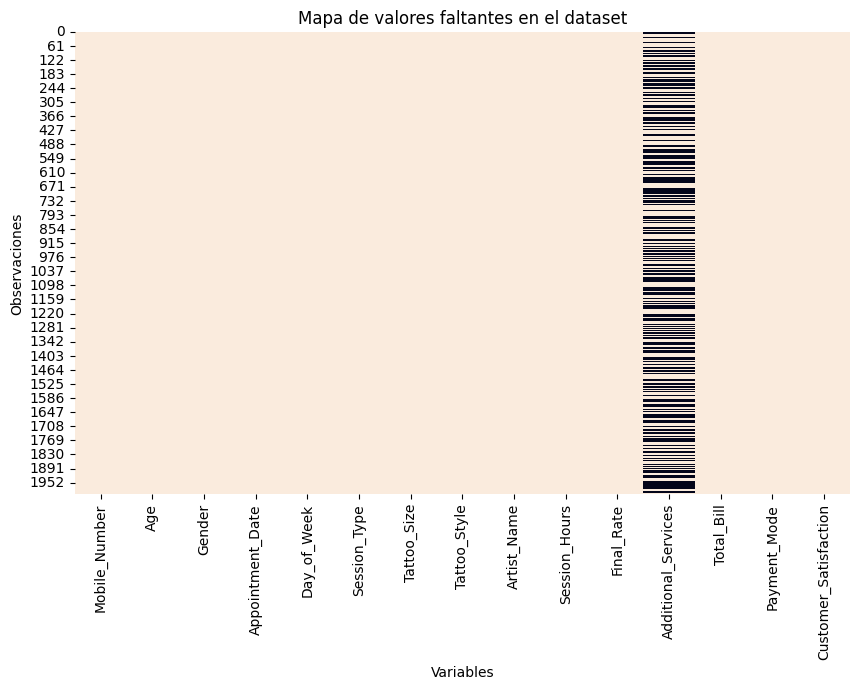

In [6]:
ld.mapa_nulos(df)

In [7]:
df_limpio = ld.manejar_nulos(df)
df_limpio.head()


,Mobile_Number,Age,Gender,Appointment_Date,Day_of_Week,Session_Type,Tattoo_Size,Tattoo_Style,Artist_Name,Session_Hours,Final_Rate,Additional_Services,Total_Bill,Payment_Mode,Customer_Satisfaction
0,3.478163e+09,46.0,Female,2024-11-15,Friday,Pre-booked,Sleeve/Back,Minimalist,Artist B,9.0,47647.0,Desconocido,47647.0,UPI,3.0
1,3.107420e+09,32.0,Male,2024-12-14,Saturday,Walk-in,Small,Custom,Artist C,1.0,42498.0,Desconocido,42498.0,Card,2.0
2,4.181242e+09,25.0,Male,2024-11-08,Friday,Pre-booked,Sleeve/Back,Custom,Artist A,10.0,19778.0,Desconocido,19778.0,Cash,1.0
3,4.051803e+09,38.0,Female,2024-03-01,Friday,Pre-booked,Medium,Script,Artist D,4.0,5478.0,Desconocido,5478.0,Cash,4.0
4,3.958683e+09,36.0,Male,2024-03-06,Wednesday,Pre-booked,Sleeve/Back,Tribal,Artist B,10.0,32471.0,Consultation Fee,33471.0,Card,1.0


In [9]:
df_sin_nulos = ld.eliminar_nulos(df)

In [10]:
print("Filas originales:", df.shape[0])
print("Filas sin nulos:", df_sin_nulos.shape[0])
df_sin_nulos.head()


Filas originales: 2000
Filas sin nulos: 1012


,Mobile_Number,Age,Gender,Appointment_Date,Day_of_Week,Session_Type,Tattoo_Size,Tattoo_Style,Artist_Name,Session_Hours,Final_Rate,Additional_Services,Total_Bill,Payment_Mode,Customer_Satisfaction
4,3958682846,36,Male,2024-03-06,Wednesday,Pre-booked,Sleeve/Back,Tribal,Artist B,10,32471,Consultation Fee,33471,Card,1
5,3599310825,40,Male,2024-02-19,Monday,Pre-booked,Medium,Custom,Artist C,4,44910,Consultation Fee,45910,UPI,4
9,5536146025,53,Other,2024-10-12,Saturday,Pre-booked,Small,Custom,Artist C,1,45278,Piercing,46778,Card,3
10,4812140441,41,Male,2024-07-06,Saturday,Walk-in,Small,Custom,Artist B,1,19780,Aftercare Kit,20280,Card,1
12,3127978094,39,Male,2024-04-11,Thursday,Pre-booked,Medium,Realism,Artist D,2,45260,Piercing,46760,Cash,1


In [11]:
df_moda = ld. imputar_con_moda(df.copy(), "Gender")  # CAMBIA por una columna real
df_moda.head()


,Mobile_Number,Age,Gender,Appointment_Date,Day_of_Week,Session_Type,Tattoo_Size,Tattoo_Style,Artist_Name,Session_Hours,Final_Rate,Additional_Services,Total_Bill,Payment_Mode,Customer_Satisfaction
0,3478163327,46,Female,2024-11-15,Friday,Pre-booked,Sleeve/Back,Minimalist,Artist B,9,47647,NaN,47647,UPI,3
1,3107420369,32,Male,2024-12-14,Saturday,Walk-in,Small,Custom,Artist C,1,42498,NaN,42498,Card,2
2,4181241943,25,Male,2024-11-08,Friday,Pre-booked,Sleeve/Back,Custom,Artist A,10,19778,NaN,19778,Cash,1
3,4051802512,38,Female,2024-03-01,Friday,Pre-booked,Medium,Script,Artist D,4,5478,NaN,5478,Cash,4
4,3958682846,36,Male,2024-03-06,Wednesday,Pre-booked,Sleeve/Back,Tribal,Artist B,10,32471,Consultation Fee,33471,Card,1


In [12]:
ld.contador_duplicados(df)


np.int64(0)

In [14]:
df = ld.eliminar_columnas(df, ["Appointment_Date", "Mobile_Number", "Payment_mode"])


In [17]:
ld.guardar_datos(
    df_sin_nulos.drop(["Appointment_Date", "Mobile_Number", "Payment_mode"], axis=1, errors="ignore"),
    "../data/tattoo_studio_clean.csv")

